# Car manufacturer

 A car manufacturer has 50 small factories in India, China, and Brazil for the production of some small parts. File Business Data.csv shows the amount of money (in US Dollars) each of these factories has spent in a fiscal year (2019) on equipment, workers' salary, raw materials; and the end year profit. Build a model to predict the profit if the company decides to build new factories and plan a business (i.e. the amount to spend on equipment, salary, and materials) in each of these countries.

In [82]:
# import libraries
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
# Import dataset
businessdata = pd.read_csv('Business Data.csv')

businessdata.head()

,Equipment Spend,Employee Salary,Raw Materials Spend,Country,Profit
0,165349,136898,471784,India,192262
1,162598,151378,443899,China,191792
2,153442,101146,407935,Brezil,191050
3,144372,118672,383200,India,182902
4,142107,91392,366168,Brezil,166188


In [84]:
businessdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Equipment Spend      50 non-null     int64 
 1   Employee Salary      50 non-null     int64 
 2   Raw Materials Spend  50 non-null     int64 
 3   Country              50 non-null     object
 4   Profit               50 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


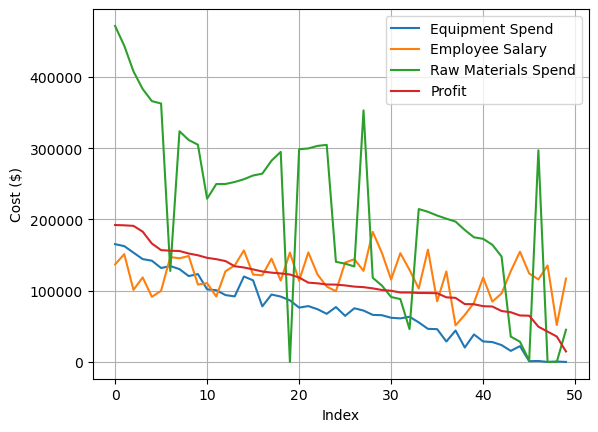

In [85]:
# Visualize data to check for outliers and distribution
plt.plot(businessdata['Equipment Spend'], label = 'Equipment Spend')
plt.plot(businessdata['Employee Salary'], label = 'Employee Salary')
plt.plot(businessdata['Raw Materials Spend'], label = 'Raw Materials Spend')
plt.plot(businessdata['Profit'], label = 'Profit')
plt.xlabel('Index')
plt.ylabel('Cost ($)')
plt.grid(True)
plt.legend()
plt.show()

We can note that Equipment Spend follows similar trends as the profits

In [86]:
#Separate inputs and outputs
X = businessdata.iloc[:,:4]
Y = businessdata.iloc[:, 4]


In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = ct.fit_transform(X)

pd.DataFrame(X)

,0,1,2,3,4,5
0,0.0000,0.0000,1.0000,165349.0000,136898.0000,471784.0000
1,0.0000,1.0000,0.0000,162598.0000,151378.0000,443899.0000
2,1.0000,0.0000,0.0000,153442.0000,101146.0000,407935.0000
3,0.0000,0.0000,1.0000,144372.0000,118672.0000,383200.0000
4,1.0000,0.0000,0.0000,142107.0000,91392.0000,366168.0000
5,0.0000,0.0000,1.0000,131877.0000,99815.0000,362861.0000
6,0.0000,1.0000,0.0000,134615.0000,147199.0000,127717.0000
7,1.0000,0.0000,0.0000,130298.0000,145530.0000,323877.0000
8,0.0000,0.0000,1.0000,120543.0000,148719.0000,311613.0000
9,0.0000,1.0000,0.0000,123335.0000,108679.0000,304982.0000


In [89]:
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets

# split training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


In [90]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

#Fit and transform
X_train[:, 3:6] = sc_x.fit_transform(X_train[:, 3:6])
X_test[:, 3:6] = sc_x.transform(X_test[:, 3:6])

# View scaled and combined data
print(X_train)

[[ 0.          1.          0.         -0.32132867  0.18701709 -1.37008634]
 [ 0.          1.          0.         -0.89557967 -1.61371512 -0.28442418]
 [ 0.          0.          1.          0.02483953  1.14323012  0.76606939]
 [ 1.          0.          0.         -1.12424018  0.10274042 -0.06438461]
 [ 0.          0.          1.          0.21042544  1.1331434  -1.75819579]
 [ 0.          1.          0.         -1.24031514 -1.09933147 -0.51179054]
 [ 0.          1.          0.         -1.78662773 -0.28951216 -1.37776684]
 [ 1.          0.          0.         -0.04587306  0.76791855 -0.62928028]
 [ 1.          0.          0.         -0.07670006 -0.06367094  0.79623556]
 [ 0.          1.          0.          0.33918707  0.43139605  0.36964782]
 [ 1.          0.          0.         -1.14205698 -1.54637947 -0.37308678]
 [ 0.          0.          1.          0.40077174  0.8046046   0.62152946]
 [ 0.          0.          1.         -1.76351904 -0.01031649 -1.74216106]
 [ 0.          0.        

In [91]:
from sklearn.linear_model import LinearRegression  # For linear regression
from sklearn.metrics import r2_score

# Apply linear regression
LinearRegModel = LinearRegression()
LinearRegModel.fit(X_train, y_train)

# Predict on test data
y_simple_pred_train = LinearRegModel.predict(X_train)
y_simple_pred_test = LinearRegModel.predict(X_test)

#Assess the accuracy of the model 
# Calculate metrics (r2_score)
r2_train = r2_score(y_train, y_simple_pred_train)
r2_test = r2_score(y_test, y_simple_pred_test)

print(r2_train)
print(r2_test)

0.9424467459170343
0.9649624678492971


In [92]:
from sklearn.preprocessing import PolynomialFeatures  # For linear regression

# Apply polynomial Regression

results = []

for degree in range(1, 9):
    #create and fit the polynomial regression model
    poly_reg = PolynomialFeatures(degree)
    X_poly = poly_reg.fit_transform(X_train)
    X_poly_test = poly_reg.transform(X_test)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y_train)

    # Make Predictions
    y_poly_pred_train = poly_model.predict(X_poly)
    y_poly_pred_test = poly_model.predict(X_poly_test)

    # Calculate metrics (r2_score)
    r2_train = r2_score(y_train, y_poly_pred_train)
    r2_test = r2_score(y_test, y_poly_pred_test)

    results.append({
        'Degree': degree,
        'R2 (Train)': r2_train, 
        'R2 (Test)': r2_test
    })

    #Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Find the best model based on test R2 score
    best_model = results_df.loc[results_df['R2 (Test)'].idxmax()]

# Set the display option for pandas to show floats with 3 decimal places
pd.options.display.float_format = '{:.4f}'.format

print("Best Index: ")
print(best_model)
print(results_df)
    

Best Index: 
Degree       1.0000
R2 (Train)   0.9424
R2 (Test)    0.9650
Name: 0, dtype: float64
   Degree  R2 (Train)  R2 (Test)
0       1      0.9424     0.9650
1       2      0.9617     0.9369
2       3      1.0000  -417.3745
3       4      1.0000    -2.6338
4       5      1.0000   -15.4574
5       6      1.0000    -2.4066
6       7      1.0000  -183.0323
7       8      1.0000  -108.1522
